# Trabalho Final - Análise de Dados com Python

Integrantes:

    1) nome1
    2) nome2
    3) nome3
    4) nome4

### Enunciado

A QuantumFinance possui um modelo de risco de crédito desatualizado, que tem concedido cartões para um número muito alto de mau pagadores e gerando problemas financeiros para a companhia.

O objetivo é realizar uma análise exploratória para compreender o comportamento dos dados e tentar descobrir um padrão que explique e diferencie clientes bons de maus pagadores.

Seu trabalho é:

1. Explorar e analisar os dados para entender a distribuição das características e a relação com a classificação de cada cliente.

2. Responder as seguintes perguntas:

    * Como as features sexo, estado civil, quantidade de dependentes e nível educacional está relacionada com a variável meta?
    * Plote um gráfico que mostre a distribuição de bons e maus pagadores por estado. Escolha o gráfico que achar mais conveniente
    * Use boxplot para explicar como o tipo de residência interfere na classificação do pagador
    * Como as features renda pessoal mensal e outras rendas se relacionam com a variável meta? (obs: não é correlação estatística)
    * A idade interfere na classificação do pagador?

#### Entregáveis:

Jupyter Notebook:  O notebook deverá estar bem organizado com seções claras e textos que facilitem a compreensão da análise e decisões tomadas e que permita a obtenção do resultado final a partir do dataset disponibilizado.


# 1. Introdução

# 2. Configurações Iniciais

## 2.1. Importação de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2.2. Carregamento dos Dados

In [2]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/credit.csv", encoding='unicode_escape', sep='\t', header=None)
df_raw.head()

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_11903/2212260923.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/credit.csv", encoding='unicode_escape', sep='\t', header=None)


,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1


### 2.2.1 Ajustando Colunas

In [3]:
df_original = df_raw.copy()

list_columns = ['ID_CLIENTE','TIPO_FUNCIONARIO','DIA_PAGAMENTO','TIPO_ENVIO_APLICACAO','QUANT_CARTOES_ADICIONAIS','TIPO_ENDERECO_POSTAL','SEXO','ESTADO_CIVIL','QUANT_DEPENDENTES','NIVEL_EDUCACIONAL','ESTADO_NASCIMENTO','CIDADE_NASCIMENTO','NACIONALIDADE','ESTADO_RESIDENCIAL',
              'CIDADE_RESIDENCIAL','BAIRRO_RESIDENCIAL','FLAG_TELEFONE_RESIDENCIAL','CODIGO_AREA_TELEFONE_RESIDENCIAL','TIPO_RESIDENCIA','MESES_RESIDENCIA','FLAG_TELEFONE_MOVEL','FLAG_EMAIL','RENDA_PESSOAL_MENSAL','OUTRAS_RENDAS','FLAG_VISA','FLAG_MASTERCARD','FLAG_DINERS',
              'FLAG_AMERICAN_EXPRESS','FLAG_OUTROS_CARTOES','QUANT_CONTAS_BANCARIAS','QUANT_CONTAS_BANCARIAS_ESPECIAIS','VALOR_PATRIMONIO_PESSOAL','QUANT_CARROS','EMPRESA','ESTADO_PROFISSIONAL','CIDADE_PROFISSIONAL','BAIRRO_PROFISSIONAL','FLAG_TELEFONE_PROFISSIONAL',
              'CODIGO_AREA_TELEFONE_PROFISSIONAL','MESES_NO_TRABALHO','CODIGO_PROFISSAO','TIPO_OCUPACAO','CODIGO_PROFISSAO_CONJUGE','NIVEL_EDUCACIONAL_CONJUGE','FLAG_DOCUMENTO_RESIDENCIAL','FLAG_RG','FLAG_CPF','FLAG_COMPROVANTE_RENDA','PRODUTO','FLAG_REGISTRO_ACSP','IDADE',
              'CEP_RESIDENCIAL_3','CEP_PROFISSIONAL_3','ROTULO_ALVO',]
df_original.columns = list_columns

## 2.3. Parametros e funções

In [4]:
#Configurações do notebook
pd.set_option('display.max_columns', None)

In [67]:
# Função para gerar gráfico de barras empilhadas com taxa de conversão
def plot_relation_variableXtarget(df, variable, target_column, ax=None):
    """
    Gera um gráfico de barras empilhadas mostrando a relação entre uma variável categórica
    e uma variável alvo (target), incluindo a taxa de conversão como texto sobre as barras.

    Args:
        df (pd.DataFrame): DataFrame contendo os dados.
        variable (str): Nome da coluna categórica no DataFrame para análise.
        target_column (str): Nome da coluna alvo (target) no DataFrame.
            Esta coluna deve conter valores binários (0 e 1) para calcular a taxa de conversão.
        ax (matplotlib.axes._subplots.AxesSubplot, opcional): Objeto do eixo onde o gráfico será desenhado.
            Se não for fornecido, será criado automaticamente.

    Returns:
        matplotlib.axes._subplots.AxesSubplot: Eixo com o gráfico desenhado.
    """
    if ax is None:
        ax = plt.gca()  # Obtém o eixo atual se nenhum for fornecido
    # Contando a frequência de cada combinação da variável e do alvo
    count_df = df.groupby([variable, target_column]).size().unstack(fill_value=0)

    # Calculando a taxa de conversão para cada valor da variável
    conversion_rate = count_df[1] / count_df.sum(axis=1)

    # Plotando o gráfico de barras empilhadas
    ax = count_df.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], ax=ax)

    # Adicionando a taxa de conversão como texto sobre as barras
    for i, (index, row) in enumerate(count_df.iterrows()):
        rate = conversion_rate.loc[index]
        ax.text(i, row.sum() + 0.1, f'{rate:.2f}%', ha='center', va='bottom', color='black')

    # Ajustando o gráfico
    ax.set_title(f'Relação entre {variable} e {target_column})')
    ax.set_xlabel(variable)
    ax.set_ylabel('Contagem')

In [60]:
def agrupar_top_10(df, coluna):
    """
    Agrupa os valores de uma coluna em um DataFrame para manter apenas os 10 valores mais frequentes.
    Os demais valores são substituídos por "Outros".

    Args:
        df (pd.DataFrame): DataFrame com os dados.
        coluna (str): Nome da coluna a ser transformada.

    Returns:
        pd.DataFrame: DataFrame com a coluna transformada.
    """
    # Verifica se a coluna tem mais de 10 valores distintos
    if df[coluna].nunique() > 10:
        # Obtém os 10 valores mais frequentes
        top_10_valores = df[coluna].value_counts().head(10).index
        
        # Substitui valores que não estão entre os top 10 por "Outros"
        df[coluna] = df[coluna].apply(lambda x: x if x in top_10_valores else "OUTROS")
    
    return df

### 2.3.1 Classificação do tipo das Features

In [6]:
alvo = ['ROTULO_ALVO']
feat_id = ['ID_CLIENTE']
feat_boolean = ['FLAG_VISA','FLAG_MASTERCARD','FLAG_DINERS','FLAG_AMERICAN_EXPRESS','FLAG_OUTROS_CARTOES','FLAG_DOCUMENTO_RESIDENCIAL','FLAG_RG','FLAG_CPF','FLAG_COMPROVANTE_RENDA','FLAG_TELEFONE_RESIDENCIAL','FLAG_TELEFONE_MOVEL','FLAG_EMAIL',
                'EMPRESA','FLAG_TELEFONE_PROFISSIONAL','FLAG_REGISTRO_ACSP']
feat_cateNominal = ['TIPO_FUNCIONARIO','TIPO_ENVIO_APLICACAO','SEXO','ESTADO_NASCIMENTO','CIDADE_NASCIMENTO','ESTADO_RESIDENCIAL','CIDADE_RESIDENCIAL','BAIRRO_RESIDENCIAL','ESTADO_PROFISSIONAL','CIDADE_PROFISSIONAL','BAIRRO_PROFISSIONAL','CODIGO_PROFISSAO',
                    'TIPO_OCUPACAO','CODIGO_PROFISSAO_CONJUGE','PRODUTO','CEP_RESIDENCIAL_3','CEP_PROFISSIONAL_3','ESTADO_CIVIL','CODIGO_AREA_TELEFONE_RESIDENCIAL','TIPO_RESIDENCIA','CODIGO_AREA_TELEFONE_PROFISSIONAL']
feat_cateOrdinal = ['DIA_PAGAMENTO','TIPO_ENDERECO_POSTAL','NIVEL_EDUCACIONAL','NACIONALIDADE','NIVEL_EDUCACIONAL_CONJUGE']
feat_numeContinua = ['RENDA_PESSOAL_MENSAL','OUTRAS_RENDAS','VALOR_PATRIMONIO_PESSOAL']
feat_numeDiscreta = ['QUANT_CARTOES_ADICIONAIS','QUANT_DEPENDENTES','MESES_RESIDENCIA','QUANT_CONTAS_BANCARIAS','QUANT_CONTAS_BANCARIAS_ESPECIAIS','QUANT_CARROS','MESES_NO_TRABALHO','IDADE']


In [7]:
print("alvo possui", len(alvo), "variavel")
print("feat_id possui", len(feat_id), "variaveis")
print("feat_boolean possui", len(feat_boolean), "variaveis")
print("feat_cateNominal possui", len(feat_cateNominal), "variaveis")
print("feat_cateOrdinal possui", len(feat_cateOrdinal), "variaveis")
print("feat_numeContinua possui", len(feat_numeContinua), "variaveis")
print("feat_numeDiscreta possui", len(feat_numeDiscreta), "variaveis")

alvo possui 1 variavel
feat_id possui 1 variaveis
feat_boolean possui 15 variaveis
feat_cateNominal possui 21 variaveis
feat_cateOrdinal possui 5 variaveis
feat_numeContinua possui 3 variaveis
feat_numeDiscreta possui 8 variaveis


## 2.4 Ajuste de Variáveis

In [8]:
df_features = df_original.copy()

**Boolean**

Para os dados que podem ser boolean apenas aplicamos a método astype e passamos como variável o bool.

In [9]:
# Transforma campos no formato boolean
df_features[feat_boolean] = df_features[feat_boolean].astype(bool)
df_features[feat_boolean].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   FLAG_VISA                   50000 non-null  bool 
 1   FLAG_MASTERCARD             50000 non-null  bool 
 2   FLAG_DINERS                 50000 non-null  bool 
 3   FLAG_AMERICAN_EXPRESS       50000 non-null  bool 
 4   FLAG_OUTROS_CARTOES         50000 non-null  bool 
 5   FLAG_DOCUMENTO_RESIDENCIAL  50000 non-null  bool 
 6   FLAG_RG                     50000 non-null  bool 
 7   FLAG_CPF                    50000 non-null  bool 
 8   FLAG_COMPROVANTE_RENDA      50000 non-null  bool 
 9   FLAG_TELEFONE_RESIDENCIAL   50000 non-null  bool 
 10  FLAG_TELEFONE_MOVEL         50000 non-null  bool 
 11  FLAG_EMAIL                  50000 non-null  bool 
 12  EMPRESA                     50000 non-null  bool 
 13  FLAG_TELEFONE_PROFISSIONAL  50000 non-null  bool 
 14  FLAG_R

**Dados Categóricos Nominais**

Para facilitar as análises futuras os dados Categóricos Nominais foram transformandos em object com o método astype. Também realizamos uma troca de campos vazios '' e ' ' por NaN.

In [10]:
# Transforma campos Categoricos Nominais e trata campos que deveriam nulos
df_features[feat_cateNominal] = df_features[feat_cateNominal].astype('object')
df_features[feat_cateNominal] = df_features[feat_cateNominal].replace('', np.nan)
df_features[feat_cateNominal] = df_features[feat_cateNominal].replace(' ', np.nan)
df_features[feat_cateNominal].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   TIPO_FUNCIONARIO                   50000 non-null  object
 1   TIPO_ENVIO_APLICACAO               50000 non-null  object
 2   SEXO                               49983 non-null  object
 3   ESTADO_NASCIMENTO                  47936 non-null  object
 4   CIDADE_NASCIMENTO                  47936 non-null  object
 5   ESTADO_RESIDENCIAL                 50000 non-null  object
 6   CIDADE_RESIDENCIAL                 50000 non-null  object
 7   BAIRRO_RESIDENCIAL                 49990 non-null  object
 8   ESTADO_PROFISSIONAL                15693 non-null  object
 9   CIDADE_PROFISSIONAL                15886 non-null  object
 10  BAIRRO_PROFISSIONAL                15287 non-null  object
 11  CODIGO_PROFISSAO                   42244 non-null  object
 12  TIPO

**Dados Categóricos Ordinais**

Com essa categoria os dados já estavam no formato correto.

In [11]:
# Transforma campos Categoricos Ordinais e trata campos que deveriam nulos
df_features[feat_cateOrdinal] = df_features[feat_cateOrdinal].astype('object')
df_features[feat_cateOrdinal].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   DIA_PAGAMENTO              50000 non-null  object
 1   TIPO_ENDERECO_POSTAL       50000 non-null  object
 2   NIVEL_EDUCACIONAL          50000 non-null  object
 3   NACIONALIDADE              50000 non-null  object
 4   NIVEL_EDUCACIONAL_CONJUGE  17662 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


**Dados Numéricos Contínuos**

Com essa categoria os dados já estavam no formato correto.

In [12]:
# Transforma campos Categoricos Ordinais e trata campos que deveriam nulos
df_features[feat_numeContinua].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RENDA_PESSOAL_MENSAL      50000 non-null  float64
 1   OUTRAS_RENDAS             50000 non-null  float64
 2   VALOR_PATRIMONIO_PESSOAL  50000 non-null  float64
dtypes: float64(3)
memory usage: 1.1 MB


**Dados Numéricos Discretos**

Com essa categoria os dados já estavam no formato correto.

In [13]:
# Transforma campos Categoricos Discretas e trata campos que deveriam nulos
df_features[feat_numeDiscreta].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   QUANT_CARTOES_ADICIONAIS          50000 non-null  int64  
 1   QUANT_DEPENDENTES                 50000 non-null  int64  
 2   MESES_RESIDENCIA                  46223 non-null  float64
 3   QUANT_CONTAS_BANCARIAS            50000 non-null  int64  
 4   QUANT_CONTAS_BANCARIAS_ESPECIAIS  50000 non-null  int64  
 5   QUANT_CARROS                      50000 non-null  int64  
 6   MESES_NO_TRABALHO                 50000 non-null  int64  
 7   IDADE                             50000 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 3.1 MB


## 2.4. Visualização Inicial

In [14]:
df_features.head(10)

,ID_CLIENTE,TIPO_FUNCIONARIO,DIA_PAGAMENTO,TIPO_ENVIO_APLICACAO,QUANT_CARTOES_ADICIONAIS,TIPO_ENDERECO_POSTAL,SEXO,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,ESTADO_NASCIMENTO,CIDADE_NASCIMENTO,NACIONALIDADE,ESTADO_RESIDENCIAL,CIDADE_RESIDENCIAL,BAIRRO_RESIDENCIAL,FLAG_TELEFONE_RESIDENCIAL,CODIGO_AREA_TELEFONE_RESIDENCIAL,TIPO_RESIDENCIA,MESES_RESIDENCIA,FLAG_TELEFONE_MOVEL,FLAG_EMAIL,RENDA_PESSOAL_MENSAL,OUTRAS_RENDAS,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OUTROS_CARTOES,QUANT_CONTAS_BANCARIAS,QUANT_CONTAS_BANCARIAS_ESPECIAIS,VALOR_PATRIMONIO_PESSOAL,QUANT_CARROS,EMPRESA,ESTADO_PROFISSIONAL,CIDADE_PROFISSIONAL,BAIRRO_PROFISSIONAL,FLAG_TELEFONE_PROFISSIONAL,CODIGO_AREA_TELEFONE_PROFISSIONAL,MESES_NO_TRABALHO,CODIGO_PROFISSAO,TIPO_OCUPACAO,CODIGO_PROFISSAO_CONJUGE,NIVEL_EDUCACIONAL_CONJUGE,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG_REGISTRO_ACSP,IDADE,CEP_RESIDENCIAL_3,CEP_PROFISSIONAL_3,ROTULO_ALVO
0,1,C,5,Web,0,1,F,6,1,0,RN,Assu,1,RN,Santana do Matos,Centro,True,105,1.0,15.0,True,True,900.0,0.0,True,True,False,False,False,0,0,0.0,0,True,NaN,NaN,NaN,True,NaN,0,9.0,4.0,NaN,NaN,False,False,False,False,1,True,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,True,20,1.0,1.0,True,True,750.0,0.0,False,False,False,False,False,0,0,0.0,0,True,NaN,NaN,NaN,True,NaN,0,11.0,4.0,11.0,NaN,False,False,False,False,1,True,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,True,105,1.0,NaN,True,True,500.0,0.0,False,False,False,False,False,0,0,0.0,0,True,NaN,NaN,NaN,True,NaN,0,11.0,NaN,NaN,NaN,False,False,False,False,1,True,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,True,NaN,NaN,NaN,True,True,500.0,0.0,False,False,False,False,False,0,0,0.0,0,True,NaN,NaN,NaN,True,NaN,0,NaN,NaN,NaN,NaN,False,False,False,False,1,True,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,True,20,1.0,12.0,True,True,1200.0,0.0,False,False,False,False,False,0,0,0.0,0,True,NaN,NaN,NaN,True,NaN,0,9.0,5.0,NaN,NaN,False,False,False,False,1,True,48,235,235,1
5,6,C,10,0,0,1,M,2,0,0,MG,CARMO DO RIO CLARO,1,MG,ALFENAS,Campos Eliseos,True,33,1.0,4.0,True,True,500.0,0.0,False,False,False,False,False,1,1,0.0,1,True,MG,ALFENAS,JARDIM SAO CARLOS,True,NaN,0,9.0,2.0,0.0,0.0,False,False,False,False,2,True,40,371,371,1
6,7,C,15,Carga,0,1,F,2,2,0,BA,salvador,1,BA,SALVADOR,VALERIA,True,81,1.0,1.0,True,True,320.0,0.0,False,False,False,False,False,0,0,0.0,0,True,NaN,NaN,NaN,True,NaN,0,11.0,4.0,11.0,NaN,False,False,False,False,1,True,40,413,413,1
7,8,C,25,Web,0,1,F,1,0,0,MG,ATALEIA,1,SP,Itapecerica da Serra,Lagoa,True,NaN,1.0,4.0,True,True,489.0,0.0,False,False,False,False,False,0,0,0.0,0,True,SP,Barueri,alphaville Industrial,True,5,0,11.0,2.0,NaN,NaN,False,False,False,False,1,True,28,686,686,0
8,9,C,15,0,0,1,F,1,0,0,SP,LENCOIS PAULISTA,1,SP,MACATUBA,PLANALTO,True,12,1.0,0.0,True,True,450.0,0.0,False,False,False,False,False,1,1,0.0,1,True,NaN,NaN,NaN,True,NaN,0,0.0,2.0,0.0,0.0,False,False,False,False,2,True,31,172,172,0
9,10,C,5,0,0,1,F,1,0,0,RS,SANTA MARIA,1,RS,PORTO ALEGRE,BOM JESUS,True,54,1.0,5.0,True,True,1507.0,0.0,True,True,False,False,False,1,1,0.0,1,True,RS,PORTO ALEGRE,MENINO DEUS,True,54,0,9.0,2.0,11.0,0.0,False,False,False,False,1,True,41,914,914,0


In [15]:
df_features.tail(10)

,ID_CLIENTE,TIPO_FUNCIONARIO,DIA_PAGAMENTO,TIPO_ENVIO_APLICACAO,QUANT_CARTOES_ADICIONAIS,TIPO_ENDERECO_POSTAL,SEXO,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,ESTADO_NASCIMENTO,CIDADE_NASCIMENTO,NACIONALIDADE,ESTADO_RESIDENCIAL,CIDADE_RESIDENCIAL,BAIRRO_RESIDENCIAL,FLAG_TELEFONE_RESIDENCIAL,CODIGO_AREA_TELEFONE_RESIDENCIAL,TIPO_RESIDENCIA,MESES_RESIDENCIA,FLAG_TELEFONE_MOVEL,FLAG_EMAIL,RENDA_PESSOAL_MENSAL,OUTRAS_RENDAS,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OUTROS_CARTOES,QUANT_CONTAS_BANCARIAS,QUANT_CONTAS_BANCARIAS_ESPECIAIS,VALOR_PATRIMONIO_PESSOAL,QUANT_CARROS,EMPRESA,ESTADO_PROFISSIONAL,CIDADE_PROFISSIONAL,BAIRRO_PROFISSIONAL,FLAG_TELEFONE_PROFISSIONAL,CODIGO_AREA_TELEFONE_PROFISSIONAL,MESES_NO_TRABALHO,CODIGO_PROFISSAO,TIPO_OCUPACAO,CODIGO_PROFISSAO_CONJUGE,NIVEL_EDUCACIONAL_CONJUGE,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG_REGISTRO_ACSP,IDADE,CEP_RESIDENCIAL_3,CEP_PROFISSIONAL_3,ROTULO_ALVO
49990,49991,C,10,Web,0,1,F,4,0,0,RS,CANGUCU,1,RS,Pelotas,Fragata,True,NaN,1.0,16.0,True,True,350.00,0.0,False,False,False,False,False,0,0,0.0,0,True,NaN,NaN,NaN,True,NaN,0,NaN,NaN,NaN,NaN,False,False,False,False,1,True,66,960,960,0
49991,49992,C,10,Web,0,1,F,2,0,0,MA,ARAIOSES,1,CE,PACATUBA,VILA DAS FLORES,True,107,NaN,6.0,True,True,234.25,0.0,False,False,False,False,False,0,0,0.0,0,True,NaN,NaN,NaN,True,NaN,0,NaN,4.0,NaN,NaN,False,False,False,False,1,True,46,618,618,0
49992,49993,C,10,0,0,1,F,2,0,0,CE,PIQUET CARNEIRO CE,1,CE,Fortaleza,Jacarecanga,True,NaN,1.0,20.0,True,False,350.00,0.0,False,False,False,False,False,1,1,0.0,1,True,NaN,NaN,NaN,True,NaN,0,9.0,5.0,0.0,0.0,False,False,False,False,1,True,68,603,603,0
49993,49994,C,1,0,0,1,F,2,0,0,BA,FLORESTA AZUL,1,BA,Feira de Santana,Capuchinhos,True,86,1.0,4.0,True,True,1100.00,0.0,False,True,False,False,False,1,1,0.0,1,True,NaN,NaN,NaN,True,NaN,0,2.0,3.0,0.0,4.0,False,False,False,False,1,True,44,440,440,1
49994,49995,C,10,0,0,1,F,2,4,0,RS,PORTO ALEGRE,1,RS,ALVORADA,TIJUCA,True,54,1.0,38.0,True,True,368.00,0.0,True,False,False,False,False,1,1,0.0,0,True,RS,CANOAS,NSRA DAS GRACAS,True,54,0,9.0,2.0,NaN,NaN,False,False,False,False,1,True,38,948,948,1
49995,49996,C,10,0,0,1,F,1,2,0,RN,NATAL,1,RN,NATAL,PAJUCARA,True,105,1.0,14.0,True,True,1451.00,0.0,False,False,False,False,False,1,1,0.0,1,True,NaN,NaN,NaN,True,NaN,0,9.0,4.0,0.0,0.0,False,False,False,False,1,True,36,591,591,1
49996,49997,C,25,0,0,1,F,1,0,0,SP,LENCOIS PAULISTA,1,SP,Lencois Paulista,Nucleo Habitacional Joao Zillo,True,12,1.0,15.0,True,True,450.00,0.0,False,False,False,False,False,0,0,0.0,0,True,NaN,NaN,NaN,True,NaN,0,NaN,NaN,NaN,NaN,False,False,False,False,2,True,21,186,186,0
49997,49998,C,5,Web,0,1,M,2,3,0,PR,RIO BONITO,1,SP,GUARULHOS,jardim vida nova,True,5,2.0,5.0,True,True,1555.00,0.0,False,False,False,False,False,0,0,0.0,0,True,SP,GUARULHOS,ITAPEGICA,True,5,0,9.0,2.0,NaN,NaN,False,False,False,False,1,True,41,715,715,0
49998,49999,C,1,Web,0,1,F,1,1,0,SP,SAO PAULO,1,MG,CONTAGEM,VILA BELEM,True,29,1.0,NaN,True,True,1443.27,0.0,False,False,False,False,False,0,0,0.0,0,True,MG,BETIM,JARDIM ALTEROSA,True,29,0,9.0,2.0,NaN,NaN,False,False,False,False,1,True,28,320,320,1
49999,50000,C,10,Web,0,1,F,2,2,0,SP,PINDABA,1,SP,Pindamonhangaba,Feital,True,NaN,1.0,9.0,True,True,719.38,0.0,False,False,False,False,False,0,0,0.0,0,True,SP,PINDABA,CIDADE NOVA,True,9,0,9.0,2.0,NaN,NaN,False,False,False,False,1,True,27,124,124,0


# 3. Análise Exploratória Geral

## 3.1 Descrição Estatística e Informacões Gerais

In [16]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID_CLIENTE                         50000 non-null  int64  
 1   TIPO_FUNCIONARIO                   50000 non-null  object 
 2   DIA_PAGAMENTO                      50000 non-null  object 
 3   TIPO_ENVIO_APLICACAO               50000 non-null  object 
 4   QUANT_CARTOES_ADICIONAIS           50000 non-null  int64  
 5   TIPO_ENDERECO_POSTAL               50000 non-null  object 
 6   SEXO                               49983 non-null  object 
 7   ESTADO_CIVIL                       50000 non-null  object 
 8   QUANT_DEPENDENTES                  50000 non-null  int64  
 9   NIVEL_EDUCACIONAL                  50000 non-null  object 
 10  ESTADO_NASCIMENTO                  47936 non-null  object 
 11  CIDADE_NASCIMENTO                  47936 non-null  obj

### 3.1.1 Dados Boolean

In [17]:
df_features[feat_boolean].describe()

,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OUTROS_CARTOES,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,FLAG_TELEFONE_RESIDENCIAL,FLAG_TELEFONE_MOVEL,FLAG_EMAIL,EMPRESA,FLAG_TELEFONE_PROFISSIONAL,FLAG_REGISTRO_ACSP
count,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000
unique,2,2,2,2,2,1,1,1,1,1,1,2,1,1,1
top,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
freq,44428,45127,49934,49913,49898,50000,50000,50000,50000,50000,50000,40114,50000,50000,50000


**Insights**
- As variáveis 'FLAG_DOCUMENTO_RESIDENCIAL', 'FLAG_RG', 'FLAG_CPF', 'FLAG_COMPROVANTE_RENDA', 'FLAG_TELEFONE_RESIDENCIAL', 'FLAG_TELEFONE_MOVEL', 'EMPRESA', 'FLAG_TELEFONE_PROFISSIONAL' e 'FLAG_REGISTRO_ACSP' apresentam uma frequência igual ao número de registros (count), o que indica que possuem apenas um valor repetido em toda a coluna. Dessa forma, essas variáveis não agregam valor informativo ao modelo e, portanto, não são relevantes para a análise.

In [18]:
descarte = ['FLAG_DOCUMENTO_RESIDENCIAL', 'FLAG_RG', 'FLAG_CPF', 'FLAG_COMPROVANTE_RENDA', 'FLAG_TELEFONE_RESIDENCIAL', 'FLAG_TELEFONE_MOVEL', 'EMPRESA', 'FLAG_TELEFONE_PROFISSIONAL','FLAG_REGISTRO_ACSP']
feat_boolean = [item for item in feat_boolean if item not in descarte]

### 3.1.2 Dados Categoricos Nominal

In [19]:
df_features[feat_cateNominal].describe()

,TIPO_FUNCIONARIO,TIPO_ENVIO_APLICACAO,SEXO,ESTADO_NASCIMENTO,CIDADE_NASCIMENTO,ESTADO_RESIDENCIAL,CIDADE_RESIDENCIAL,BAIRRO_RESIDENCIAL,ESTADO_PROFISSIONAL,CIDADE_PROFISSIONAL,BAIRRO_PROFISSIONAL,CODIGO_PROFISSAO,TIPO_OCUPACAO,CODIGO_PROFISSAO_CONJUGE,PRODUTO,CEP_RESIDENCIAL_3,CEP_PROFISSIONAL_3,ESTADO_CIVIL,CODIGO_AREA_TELEFONE_RESIDENCIAL,TIPO_RESIDENCIA,CODIGO_AREA_TELEFONE_PROFISSIONAL
count,50000,50000,49983,47936,47936,50000,50000,49990,15693,15886,15287,42244.0,42687.0,21116.0,50000,50000,50000,50000,41788,48651.0,13468
unique,1,3,3,28,9909,27,3529,14510,27,2235,5056,19.0,6.0,18.0,3,1481,1481,8,101,6.0,86
top,C,Web,F,BA,RIO DE JANEIRO,SP,Sao Paulo,CENTRO,SP,FORTALEZA,CENTRO,9.0,2.0,0.0,1,960,960,2,5,1.0,5
freq,50000,28206,30805,5717,1184,8773,894,4169,2400,419,3727,30092.0,16947.0,13632.0,42690,721,721,25967,4558,41572.0,1457


**Insights**
- O campo 'TIPO_FUNCIONARIO' contém apenas um valor único, o que significa que não agrega valor informativo ao modelo e, portanto, não é relevante para a análise.

In [20]:
descarte.append('TIPO_FUNCIONARIO')
feat_cateNominal = [item for item in feat_cateNominal if item not in descarte]

### 3.1.3 Dados Categoricos Ordinais

In [21]:
df_features[feat_cateOrdinal].describe()

,DIA_PAGAMENTO,TIPO_ENDERECO_POSTAL,NIVEL_EDUCACIONAL,NACIONALIDADE,NIVEL_EDUCACIONAL_CONJUGE
count,50000,50000,50000,50000,17662.0
unique,6,2,1,3,6.0
top,10,1,0,1,0.0
freq,20422,49673,50000,47884,15995.0


**Insights**
- O campo 'NIVEL_EDUCACIONAL' contém apenas um valor único, o que significa que não agrega valor informativo ao modelo e, portanto, não é relevante para a análise.

In [22]:
descarte.append('NIVEL_EDUCACIONAL')
feat_cateOrdinal = [item for item in feat_cateOrdinal if item not in descarte]


### 3.1.4 Dados Numéricos Continuos

In [23]:
df_features[feat_numeContinua].describe()

,RENDA_PESSOAL_MENSAL,OUTRAS_RENDAS,VALOR_PATRIMONIO_PESSOAL
count,50000.000000,50000.000000,5.000000e+04
mean,886.678437,35.434760,2.322372e+03
std,7846.959327,891.515142,4.235798e+04
min,60.000000,0.000000,0.000000e+00
25%,360.000000,0.000000,0.000000e+00
50%,500.000000,0.000000,0.000000e+00
75%,800.000000,0.000000,0.000000e+00
max,959000.000000,194344.000000,6.000000e+06


### 3.1.5 Dados Numéricos Discretos

In [24]:
df_features[feat_numeDiscreta].describe()

,QUANT_CARTOES_ADICIONAIS,QUANT_DEPENDENTES,MESES_RESIDENCIA,QUANT_CONTAS_BANCARIAS,QUANT_CONTAS_BANCARIAS_ESPECIAIS,QUANT_CARROS,MESES_NO_TRABALHO,IDADE
count,50000.0,50000.000000,46223.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,0.0,0.650520,9.727149,0.357840,0.357840,0.336140,0.009320,43.24852
std,0.0,1.193655,10.668841,0.479953,0.479953,0.472392,0.383453,14.98905
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.00000
25%,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,31.00000
50%,0.0,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,41.00000
75%,0.0,1.000000,15.000000,1.000000,1.000000,1.000000,0.000000,53.00000
max,0.0,53.000000,228.000000,2.000000,2.000000,1.000000,35.000000,106.00000


**Insights**
- O campo 'QUANT_CARTOES_ADICIONAIS' contém apenas um valor único, o que significa que não agrega valor informativo ao modelo e, portanto, não é relevante para a análise.

In [25]:
descarte.append('QUANT_CARTOES_ADICIONAIS')
feat_numeDiscreta = [item for item in feat_numeDiscreta if item not in descarte]

### 3.1.5 Limpando colunas que não serão utilizadas

In [26]:
df_features_selects = df_features.drop(columns=descarte)
df_features_selects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID_CLIENTE                         50000 non-null  int64  
 1   DIA_PAGAMENTO                      50000 non-null  object 
 2   TIPO_ENVIO_APLICACAO               50000 non-null  object 
 3   TIPO_ENDERECO_POSTAL               50000 non-null  object 
 4   SEXO                               49983 non-null  object 
 5   ESTADO_CIVIL                       50000 non-null  object 
 6   QUANT_DEPENDENTES                  50000 non-null  int64  
 7   ESTADO_NASCIMENTO                  47936 non-null  object 
 8   CIDADE_NASCIMENTO                  47936 non-null  object 
 9   NACIONALIDADE                      50000 non-null  object 
 10  ESTADO_RESIDENCIAL                 50000 non-null  object 
 11  CIDADE_RESIDENCIAL                 50000 non-null  obj

## 3.2 Entendo dados nulos

In [27]:
proporcao_nulos = df_features_selects.isnull().sum() / 50000
proporcao_nulos

ID_CLIENTE                           0.00000
DIA_PAGAMENTO                        0.00000
TIPO_ENVIO_APLICACAO                 0.00000
TIPO_ENDERECO_POSTAL                 0.00000
SEXO                                 0.00034
ESTADO_CIVIL                         0.00000
QUANT_DEPENDENTES                    0.00000
ESTADO_NASCIMENTO                    0.04128
CIDADE_NASCIMENTO                    0.04128
NACIONALIDADE                        0.00000
ESTADO_RESIDENCIAL                   0.00000
CIDADE_RESIDENCIAL                   0.00000
BAIRRO_RESIDENCIAL                   0.00020
CODIGO_AREA_TELEFONE_RESIDENCIAL     0.16424
TIPO_RESIDENCIA                      0.02698
MESES_RESIDENCIA                     0.07554
FLAG_EMAIL                           0.00000
RENDA_PESSOAL_MENSAL                 0.00000
OUTRAS_RENDAS                        0.00000
FLAG_VISA                            0.00000
FLAG_MASTERCARD                      0.00000
FLAG_DINERS                          0.00000
FLAG_AMERI

In [28]:
proporcao_nulos[proporcao_nulos > 0.5]

ESTADO_PROFISSIONAL                  0.68614
CIDADE_PROFISSIONAL                  0.68228
BAIRRO_PROFISSIONAL                  0.69426
CODIGO_AREA_TELEFONE_PROFISSIONAL    0.73064
CODIGO_PROFISSAO_CONJUGE             0.57768
NIVEL_EDUCACIONAL_CONJUGE            0.64676
dtype: float64

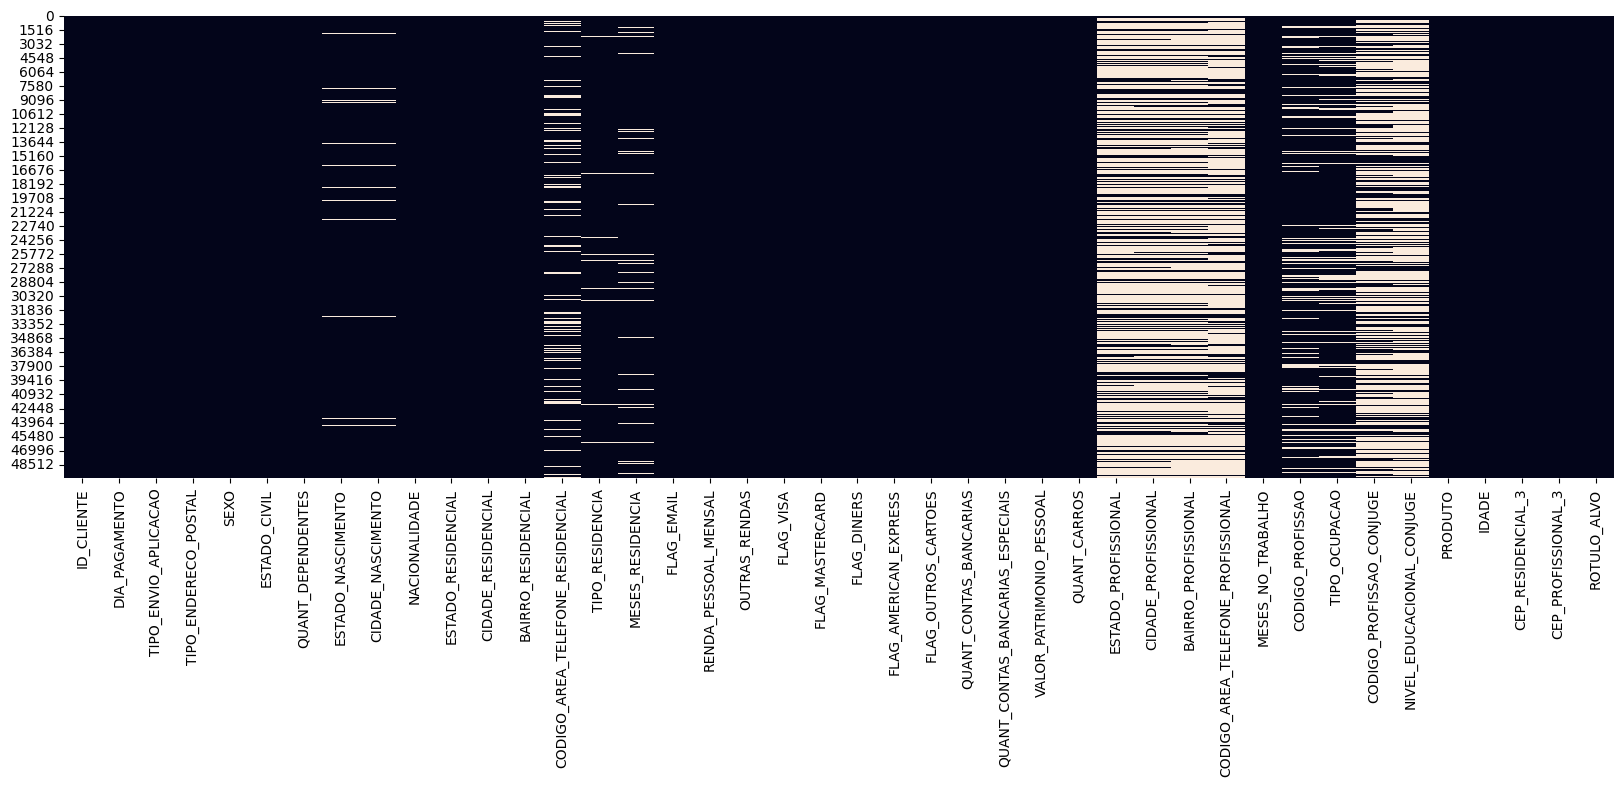

In [29]:
plt.figure(figsize=(20,6))
sns.heatmap(df_features_selects.isnull(), cbar=False)
plt.show()

**Insights**
- As variáveis 'ESTADO_PROFISSIONAL', 'CIDADE_PROFISSIONAL', 'BAIRRO_PROFISSIONAL', 'CODIGO_AREA_TELEFONE_PROFISSIONAL', 'CODIGO_PROFISSAO_CONJUGE' e 'NIVEL_EDUCACIONAL_CONJUGE' quantidade de nulos maior 50%, o que pode ser um alerta para o modelo. Entretanto, nesse momento ainda vale explorar um pouco mais.

## 3.3 Relacionamento com a Variável-Alvo

### 3.3.1 Dados Boolean

In [30]:
df_features_selects[feat_boolean + ['ROTULO_ALVO']]

,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OUTROS_CARTOES,FLAG_EMAIL,ROTULO_ALVO
0,True,True,False,False,False,True,1
1,False,False,False,False,False,True,1
2,False,False,False,False,False,True,0
3,False,False,False,False,False,True,0
4,False,False,False,False,False,True,1
...,...,...,...,...,...,...,...
49995,False,False,False,False,False,True,1
49996,False,False,False,False,False,True,0
49997,False,False,False,False,False,True,0
49998,False,False,False,False,False,True,1


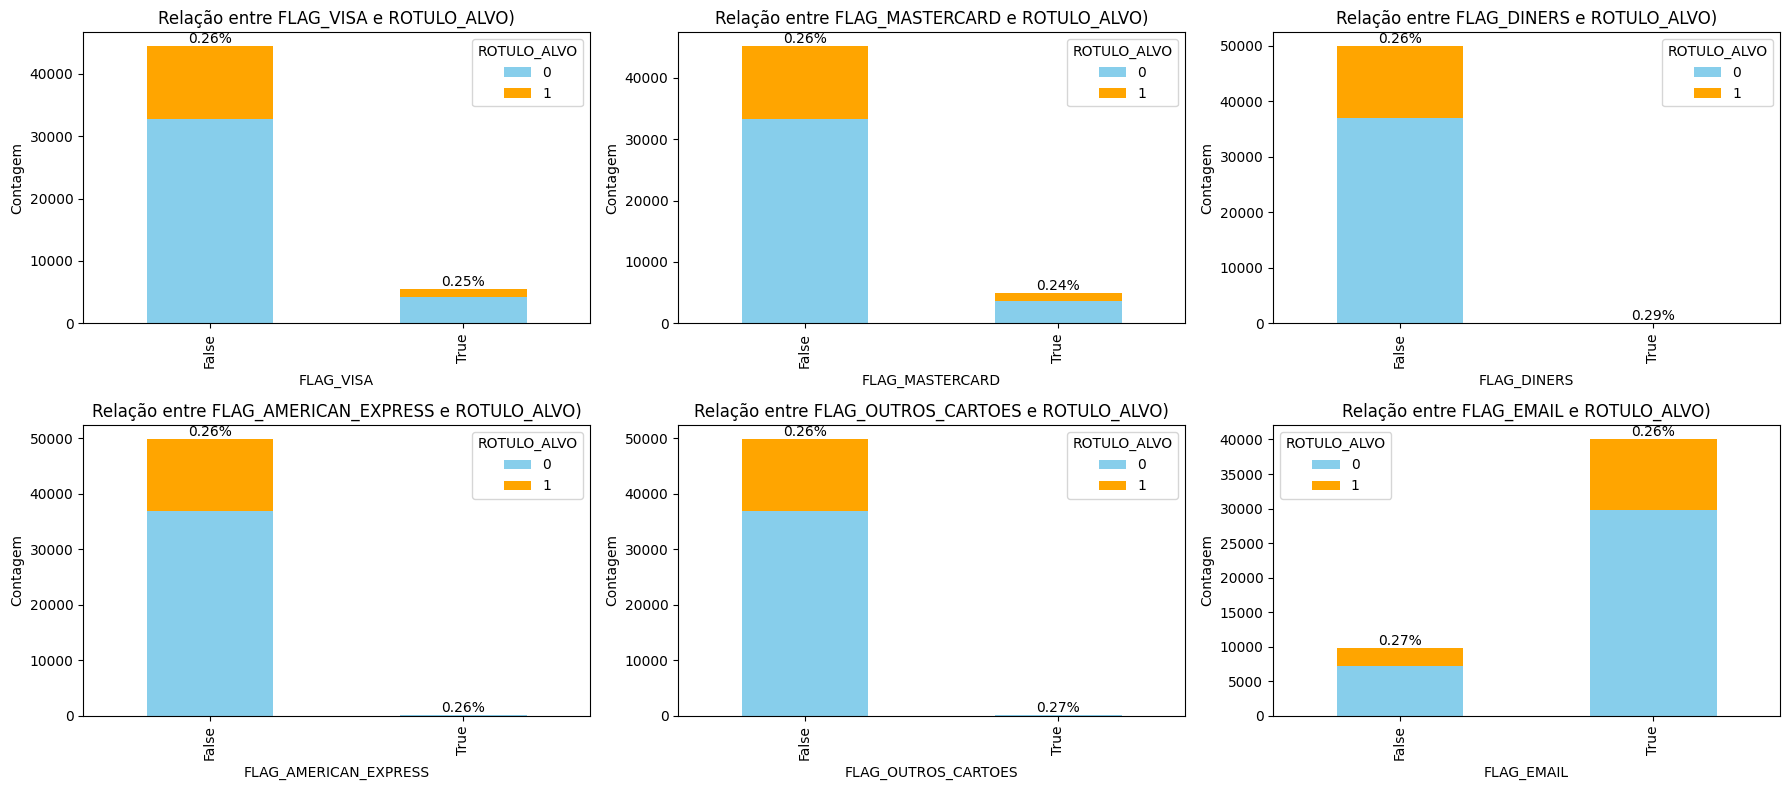

In [68]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))

# Loop para criar os gráficos
for idx, flag in enumerate(feat_boolean):
    row, col = divmod(idx, 3)  # Calcula a linha e a coluna
    plot_relation_variableXtarget(df_features, flag, 'ROTULO_ALVO', ax=axes[row, col])

plt.tight_layout()
plt.show()

### 3.3.2 Dados Categoricos Nominal

In [55]:
feat_cateNominal_viz = df_features_selects[feat_cateNominal + ['ROTULO_ALVO']].copy()
for variable in feat_cateNominal:
    agrupar_top_10(feat_cateNominal_viz, variable)

feat_cateNominal_viz


,TIPO_ENVIO_APLICACAO,SEXO,ESTADO_NASCIMENTO,CIDADE_NASCIMENTO,ESTADO_RESIDENCIAL,CIDADE_RESIDENCIAL,BAIRRO_RESIDENCIAL,ESTADO_PROFISSIONAL,CIDADE_PROFISSIONAL,BAIRRO_PROFISSIONAL,CODIGO_PROFISSAO,TIPO_OCUPACAO,CODIGO_PROFISSAO_CONJUGE,PRODUTO,CEP_RESIDENCIAL_3,CEP_PROFISSIONAL_3,ESTADO_CIVIL,CODIGO_AREA_TELEFONE_RESIDENCIAL,TIPO_RESIDENCIA,CODIGO_AREA_TELEFONE_PROFISSIONAL,ROTULO_ALVO
0,Web,F,RN,Outros,RN,Outros,Centro,Outros,Outros,Outros,9.0,4.0,Outros,1,Outros,Outros,6,105,1.0,Outros,1
1,Carga,F,RJ,Outros,RJ,RIO DE JANEIRO,Outros,Outros,Outros,Outros,11.0,4.0,11.0,1,Outros,Outros,2,20,1.0,Outros,1
2,Web,F,RN,Outros,RN,Outros,Outros,Outros,Outros,Outros,11.0,NaN,Outros,1,591,591,2,105,1.0,Outros,0
3,Web,F,PE,Outros,PE,Outros,Outros,Outros,Outros,Outros,Outros,NaN,Outros,1,Outros,Outros,2,Outros,NaN,Outros,0
4,Web,M,RJ,RIO DE JANEIRO,RJ,Outros,Outros,Outros,Outros,Outros,9.0,5.0,Outros,1,Outros,Outros,2,20,1.0,Outros,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,F,RN,NATAL,RN,Outros,Outros,Outros,Outros,Outros,9.0,4.0,0.0,1,591,591,1,105,1.0,Outros,1
49996,0,F,SP,Outros,SP,Outros,Outros,Outros,Outros,Outros,Outros,NaN,Outros,2,Outros,Outros,1,Outros,1.0,Outros,0
49997,Web,M,PR,Outros,SP,Outros,Outros,SP,Outros,Outros,9.0,2.0,Outros,1,Outros,Outros,2,5,2.0,5,0
49998,Web,F,SP,SAO PAULO,MG,Outros,Outros,MG,Outros,Outros,9.0,2.0,Outros,1,Outros,Outros,1,Outros,1.0,29,1


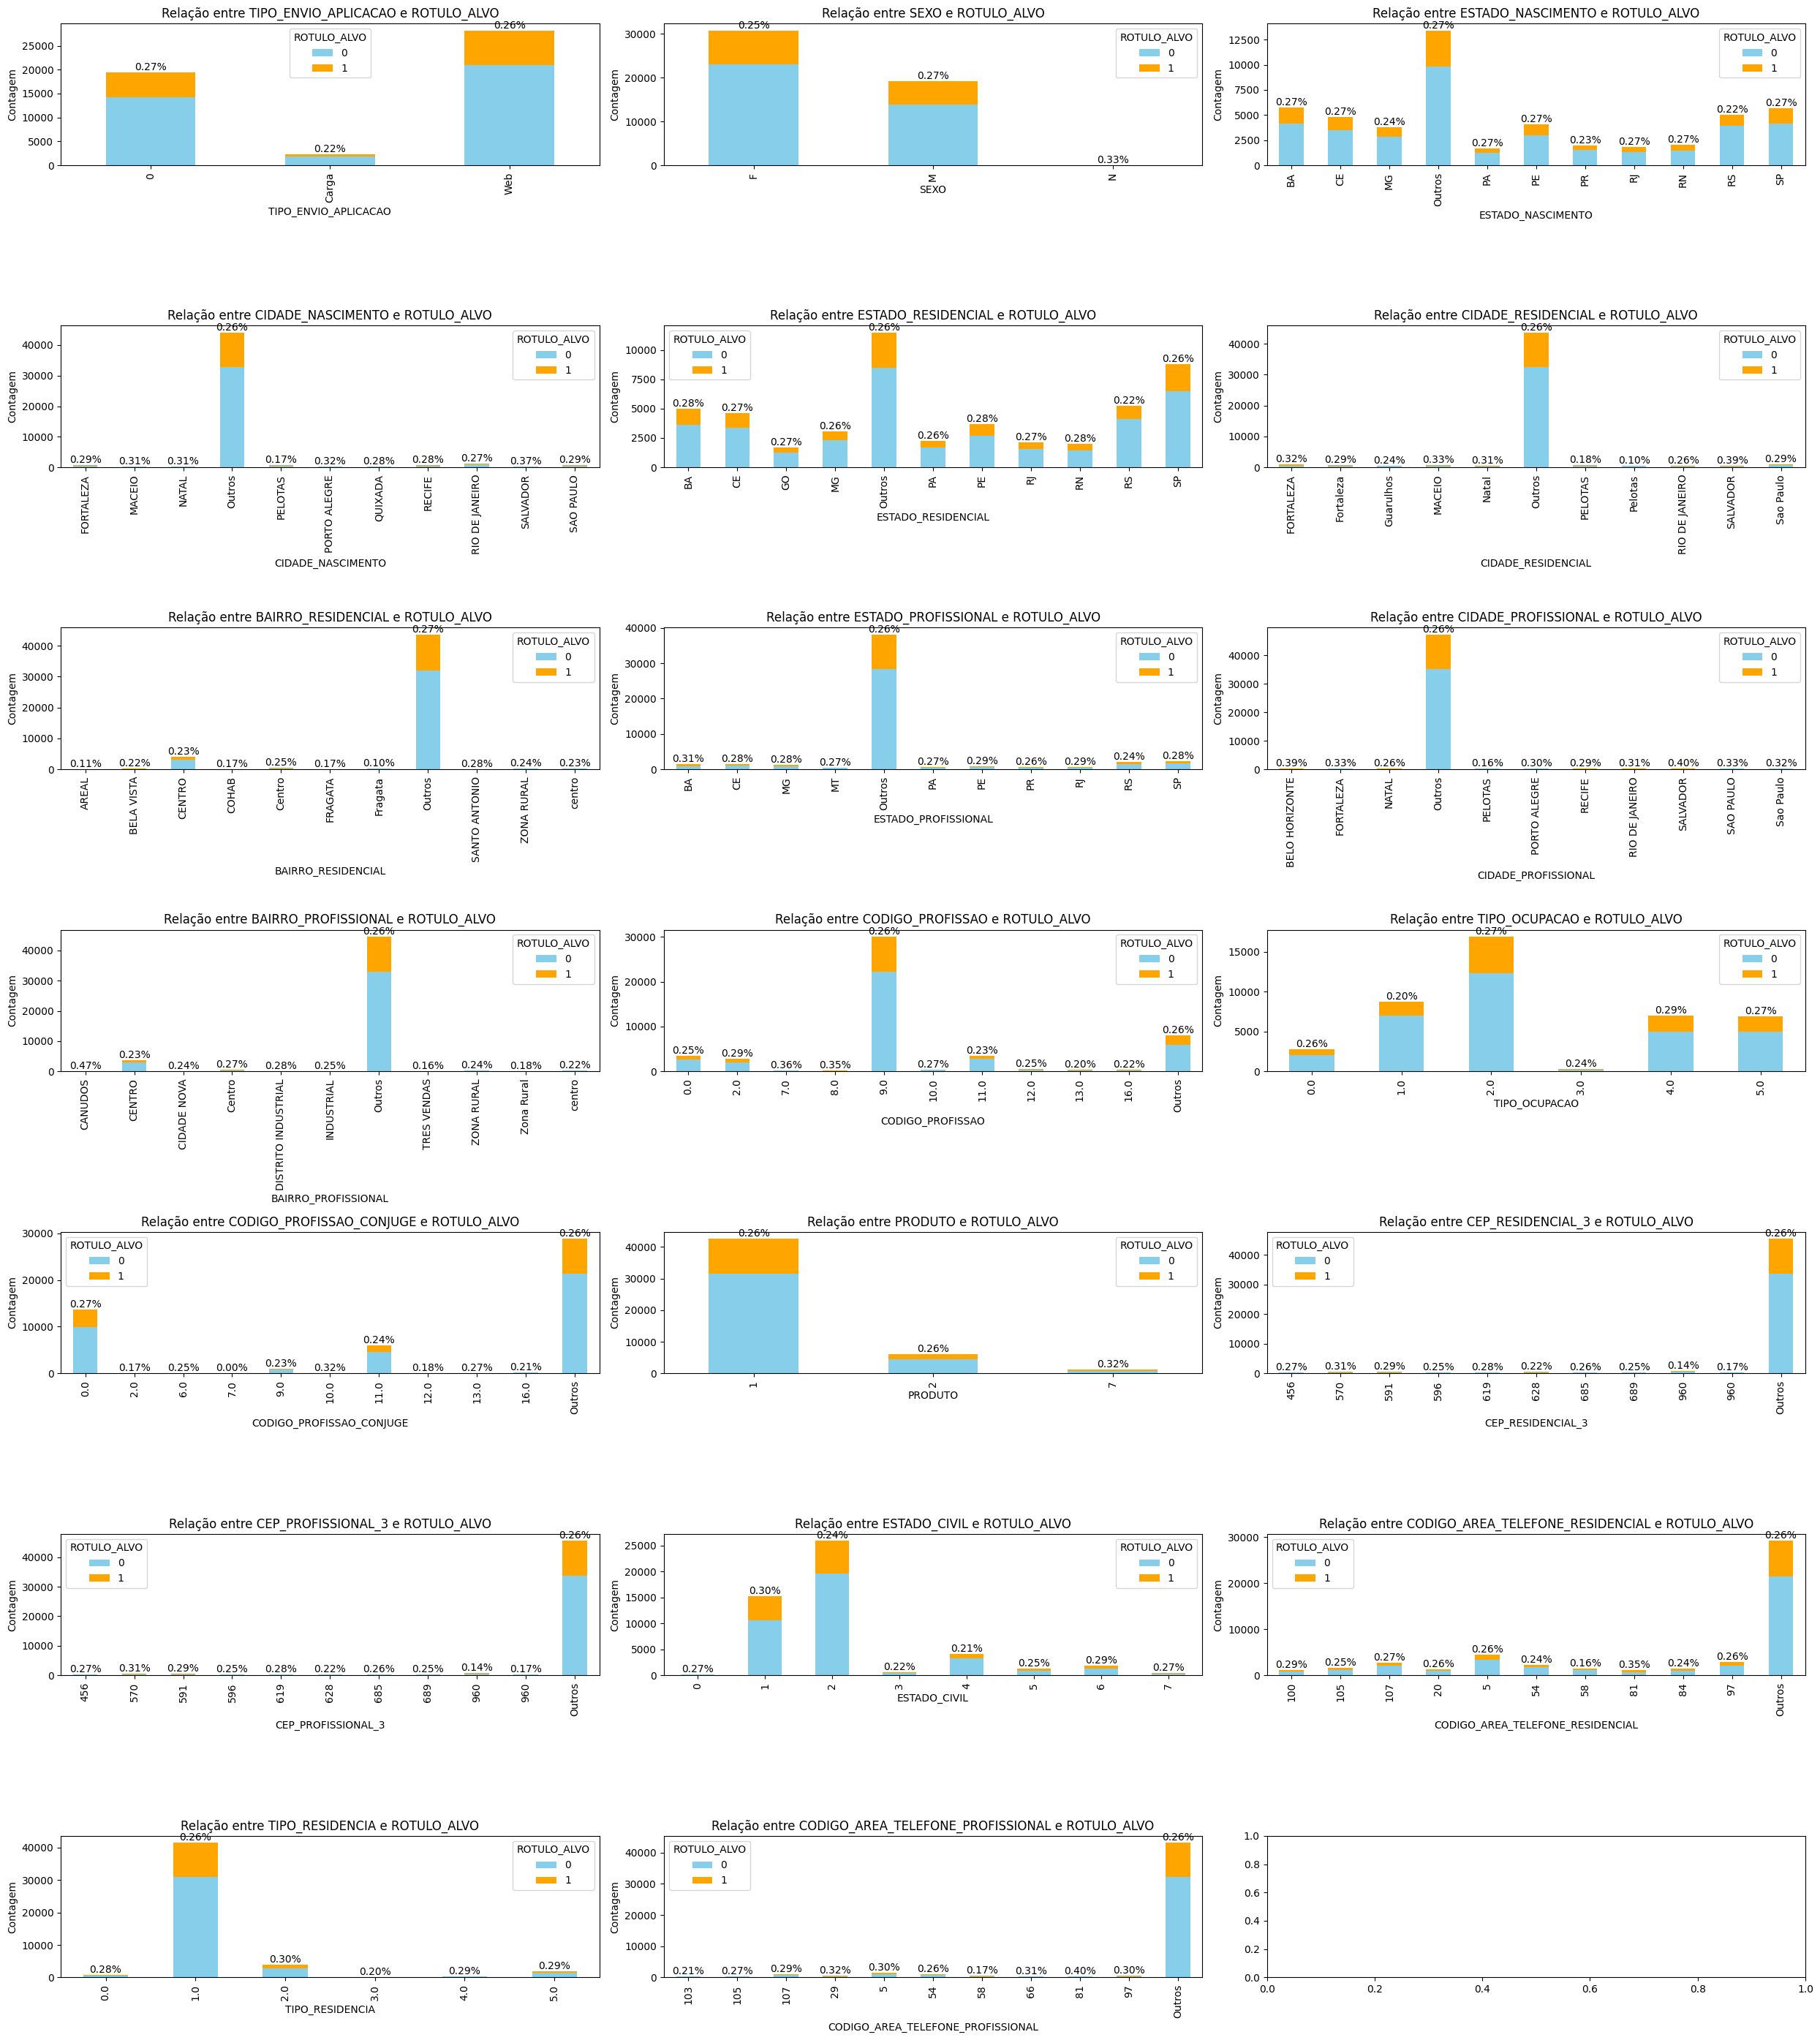

In [59]:
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(25, 28))

# Loop para criar os gráficos
for idx, flag in enumerate(feat_cateNominal):
    row, col = divmod(idx, 3)  # Calcula a linha e a coluna
    plot_relation_variableXtarget(feat_cateNominal_viz, flag, 'ROTULO_ALVO', ax=axes[row, col])

plt.tight_layout()
plt.show()

### 3.3.3 Dados Categoricos Ordinais

In [61]:
feat_cateOrdinal_viz = df_features_selects[feat_cateOrdinal + ['ROTULO_ALVO']].copy()
for variable in feat_cateOrdinal:
    agrupar_top_10(feat_cateOrdinal_viz, variable)

feat_cateOrdinal_viz

,DIA_PAGAMENTO,TIPO_ENDERECO_POSTAL,NACIONALIDADE,NIVEL_EDUCACIONAL_CONJUGE,ROTULO_ALVO
0,5,1,1,NaN,1
1,15,1,1,NaN,1
2,5,1,1,NaN,0
3,20,1,1,NaN,0
4,10,1,1,NaN,1
...,...,...,...,...,...
49995,10,1,1,0.0,1
49996,25,1,1,NaN,0
49997,5,1,1,NaN,0
49998,1,1,1,NaN,1


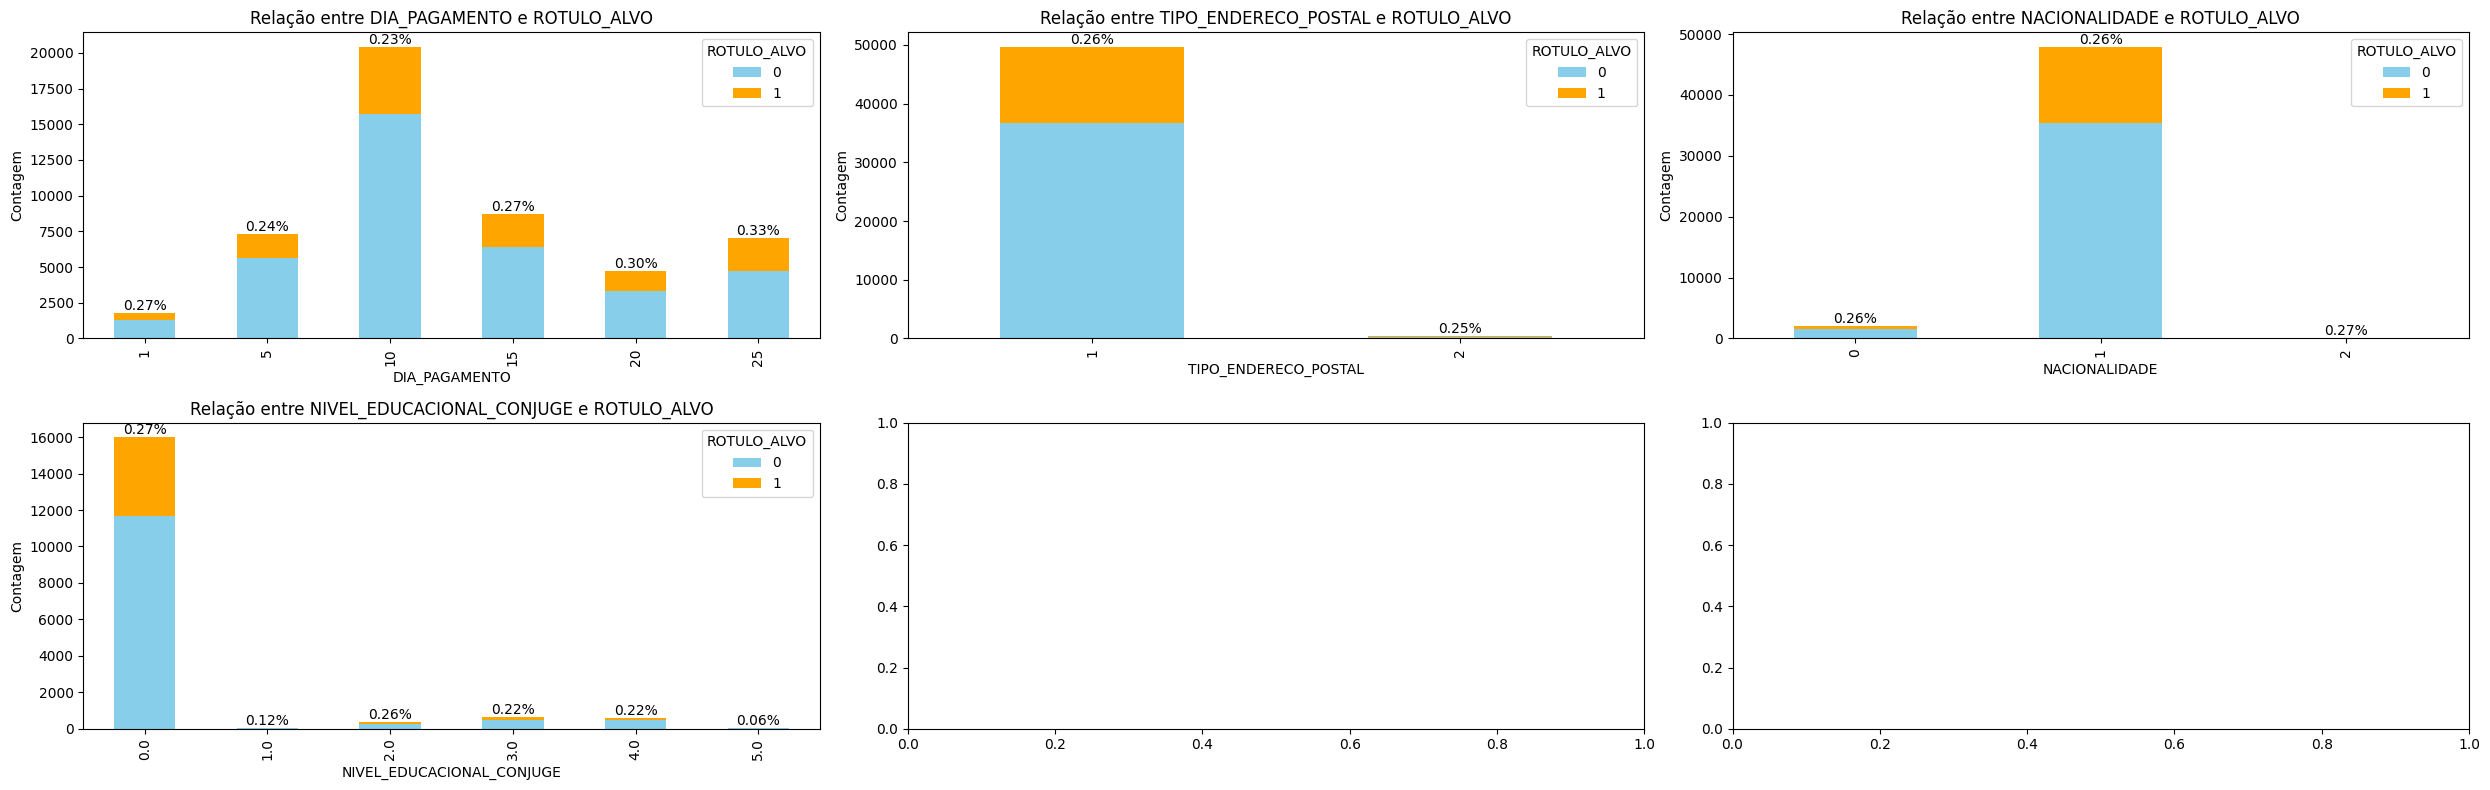

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 8))

# Loop para criar os gráficos
for idx, flag in enumerate(feat_cateOrdinal):
    row, col = divmod(idx, 3)  # Calcula a linha e a coluna
    plot_relation_variableXtarget(feat_cateOrdinal_viz, flag, 'ROTULO_ALVO', ax=axes[row, col])

plt.tight_layout()
plt.show()

### 3.3.4 Dados Numericos Continuos

In [71]:
df_features_selects[feat_numeContinua + ['ROTULO_ALVO']]

,RENDA_PESSOAL_MENSAL,OUTRAS_RENDAS,VALOR_PATRIMONIO_PESSOAL,ROTULO_ALVO
0,900.00,0.0,0.0,1
1,750.00,0.0,0.0,1
2,500.00,0.0,0.0,0
3,500.00,0.0,0.0,0
4,1200.00,0.0,0.0,1
...,...,...,...,...
49995,1451.00,0.0,0.0,1
49996,450.00,0.0,0.0,0
49997,1555.00,0.0,0.0,0
49998,1443.27,0.0,0.0,1


In [70]:
feat_numeContinua_viz = df_features_selects[feat_numeContinua + ['ROTULO_ALVO']]
feat_numeContinua_viz.corr()

,RENDA_PESSOAL_MENSAL,OUTRAS_RENDAS,VALOR_PATRIMONIO_PESSOAL,ROTULO_ALVO
RENDA_PESSOAL_MENSAL,1.000000,0.000032,0.008066,0.002819
OUTRAS_RENDAS,0.000032,1.000000,0.003353,0.004442
VALOR_PATRIMONIO_PESSOAL,0.008066,0.003353,1.000000,-0.003886
ROTULO_ALVO,0.002819,0.004442,-0.003886,1.000000


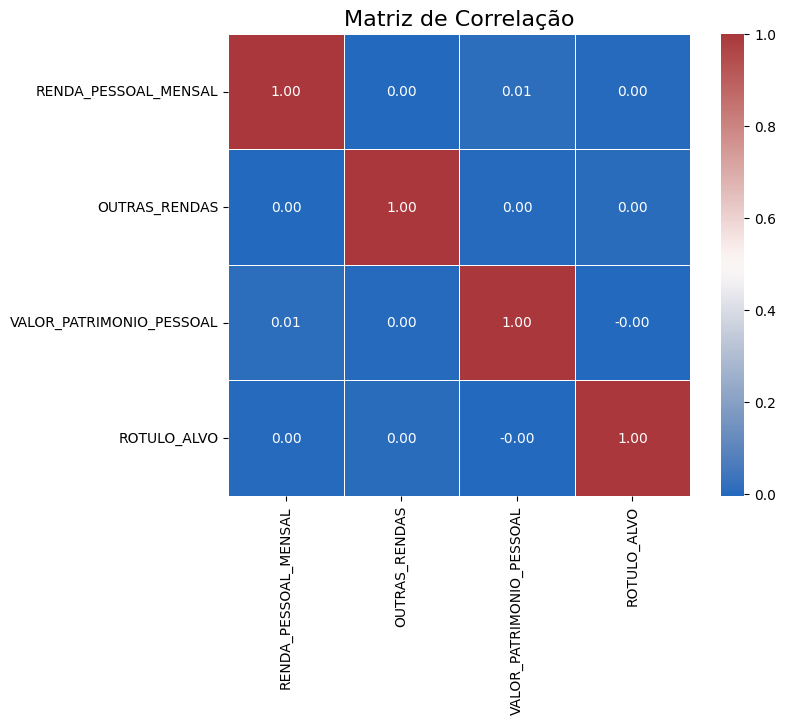

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(feat_numeContinua_viz.corr(), 
            annot=True,   
            cmap='vlag', 
            fmt=".2f",     
            square=True,  
            linewidths=0.5) 
plt.title("Matriz de Correlação", fontsize=16)
plt.show()

### 3.3.5 Dados Numericos Discretos

In [83]:
df_features_selects[feat_numeDiscreta + ['ROTULO_ALVO']]

,QUANT_DEPENDENTES,MESES_RESIDENCIA,QUANT_CONTAS_BANCARIAS,QUANT_CONTAS_BANCARIAS_ESPECIAIS,QUANT_CARROS,MESES_NO_TRABALHO,IDADE,ROTULO_ALVO
0,1,15.0,0,0,0,0,32,1
1,0,1.0,0,0,0,0,34,1
2,0,NaN,0,0,0,0,27,0
3,0,NaN,0,0,0,0,61,0
4,0,12.0,0,0,0,0,48,1
...,...,...,...,...,...,...,...,...
49995,2,14.0,1,1,1,0,36,1
49996,0,15.0,0,0,0,0,21,0
49997,3,5.0,0,0,0,0,41,0
49998,1,NaN,0,0,0,0,28,1


In [84]:
feat_numeDiscreta_viz = df_features_selects[feat_numeDiscreta + ['ROTULO_ALVO']]
feat_numeDiscreta_viz.corr()

,QUANT_DEPENDENTES,MESES_RESIDENCIA,QUANT_CONTAS_BANCARIAS,QUANT_CONTAS_BANCARIAS_ESPECIAIS,QUANT_CARROS,MESES_NO_TRABALHO,IDADE,ROTULO_ALVO
QUANT_DEPENDENTES,1.000000,-0.039378,0.028553,0.028553,0.025209,0.007597,-0.037415,0.012157
MESES_RESIDENCIA,-0.039378,1.000000,-0.047005,-0.047005,-0.043472,0.014715,0.223815,-0.029336
QUANT_CONTAS_BANCARIAS,0.028553,-0.047005,1.000000,1.000000,0.860860,-0.008341,0.024150,0.011997
QUANT_CONTAS_BANCARIAS_ESPECIAIS,0.028553,-0.047005,1.000000,1.000000,0.860860,-0.008341,0.024150,0.011997
QUANT_CARROS,0.025209,-0.043472,0.860860,0.860860,1.000000,-0.006033,0.019451,0.011706
MESES_NO_TRABALHO,0.007597,0.014715,-0.008341,-0.008341,-0.006033,1.000000,0.009908,-0.007073
IDADE,-0.037415,0.223815,0.024150,0.024150,0.019451,0.009908,1.000000,-0.107886
ROTULO_ALVO,0.012157,-0.029336,0.011997,0.011997,0.011706,-0.007073,-0.107886,1.000000


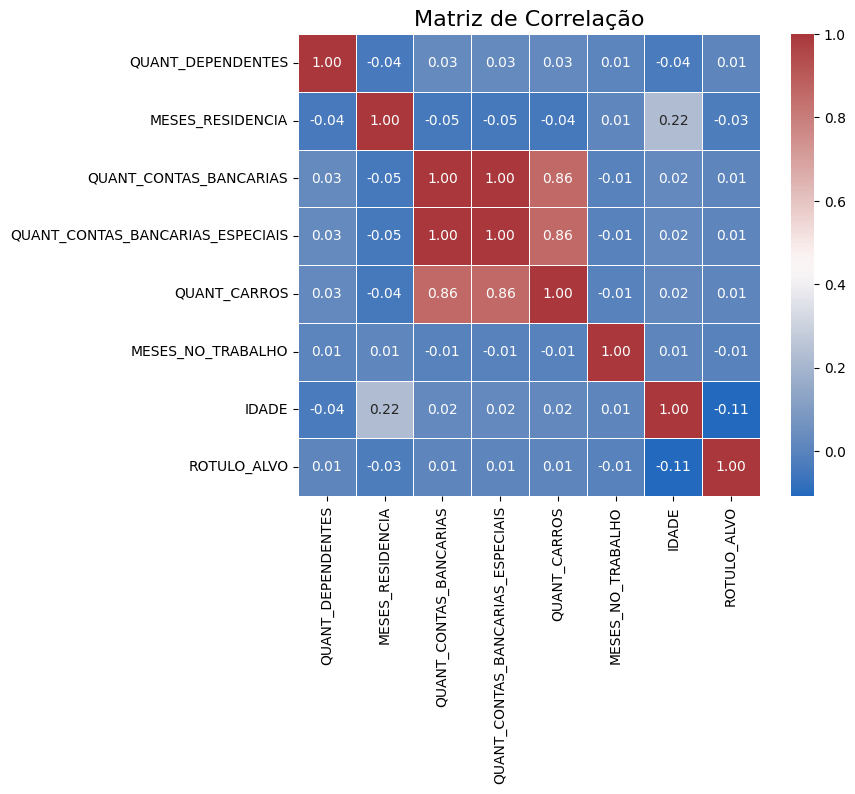

In [85]:
plt.figure(figsize=(8, 6))
sns.heatmap(feat_numeDiscreta_viz.corr(), 
            annot=True,   
            cmap='vlag', 
            fmt=".2f",     
            square=True,  
            linewidths=0.5) 
plt.title("Matriz de Correlação", fontsize=16)
plt.show()

# 4. Respondendo e aprofundando nas Questões